In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:12<00:00, 193MB/s]
100% 1.06G/1.06G [00:12<00:00, 94.3MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.resnet import ResNet50

In [30]:

# conv_base = VGG16(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(150,150,3)
# )

conv_base = ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(150,150,3)
)

94765736/94765736 [==============================] - 1s 0us/step


In [31]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [32]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               13107456  
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 36695425 (139.98 MB)
Trainable params: 36642305 (139.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [34]:

conv_base.trainable = False

In [35]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [36]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 60s 82ms/step - loss: 0.6669 - accuracy: 0.6256 - val_loss: 0.6219 - val_accuracy: 0.6400
Epoch 2/10
625/625 [==============================] - 48s 77ms/step - loss: 0.5923 - accuracy: 0.6827 - val_loss: 0.5730 - val_accuracy: 0.7034
Epoch 3/10
625/625 [==============================] - 48s 77ms/step - loss: 0.5763 - accuracy: 0.6964 - val_loss: 0.5565 - val_accuracy: 0.7184
Epoch 4/10
625/625 [==============================] - 49s 79ms/step - loss: 0.5731 - accuracy: 0.7006 - val_loss: 0.5599 - val_accuracy: 0.7222
Epoch 5/10
625/625 [==============================] - 48s 76ms/step - loss: 0.5529 - accuracy: 0.7162 - val_loss: 0.5432 - val_accuracy: 0.7248
Epoch 6/10
625/625 [==============================] - 49s 78ms/step - loss: 0.5478 - accuracy: 0.7207 - val_loss: 0.5329 - val_accuracy: 0.7380
Epoch 7/10
625/625 [==============================] - 48s 77ms/step - loss: 0.5420 - accuracy: 0.7236 - val_loss: 0.5276 - val_accuracy:

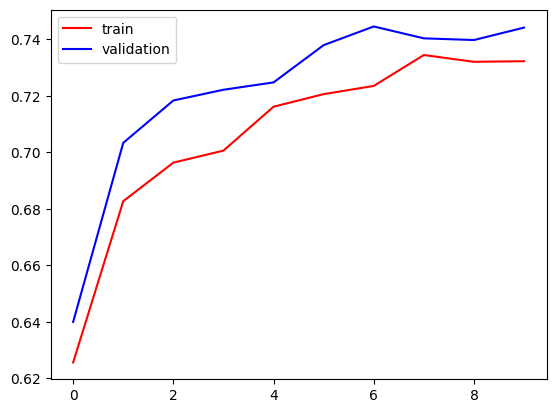

In [39]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

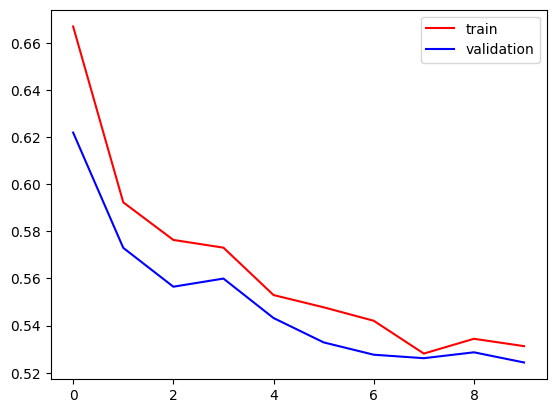

In [40]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()